In [2]:
import pandas as pd
from citipy import citipy
import requests
import json
import numpy as np
from pprint import pprint
from config import api_key
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [12]:
# generate a list of random numbers for latitude and longitude and use citipy to identify nearby city
# 250 cities above and 250 cities below equator using +ve and -ve values of latitude

lat = 90*np.random.rand(300)
lat = np.append(lat, -90*np.random.rand(300))
lng = 180*np.random.rand(300)
lng = np.append(lng, -180*np.random.rand(300))
cities =[]
citi_country=[]

for x,y in zip(lat,lng):
    city = citipy.nearest_city(x,y)
    cities.append(city.city_name)
    citi_country.append(city.country_code)

cities[0:5]


['belushya guba', 'tumannyy', 'shirokiy', 'hasaki', 'cherskiy']

In [13]:
citi_data = pd.DataFrame(columns=['name','country','latitude','longitude','temperature','cloudiness', 'humidity', 'windspeed'])
citi_data['name']=cities
citi_data['country'] =citi_country
citi_data['country']=citi_data['country'].str.upper()
citi_data.head()

,name,country,latitude,longitude,temperature,cloudiness,humidity,windspeed
0,belushya guba,RU,NaN,NaN,NaN,NaN,NaN,NaN
1,tumannyy,RU,NaN,NaN,NaN,NaN,NaN,NaN
2,shirokiy,RU,NaN,NaN,NaN,NaN,NaN,NaN
3,hasaki,JP,NaN,NaN,NaN,NaN,NaN,NaN
4,cherskiy,RU,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:

citi_data = pd.DataFrame(columns=['name','country','latitude','longitude','temperature','cloudiness', 'humidity', 'windspeed'])
citi_data['name']=cities
citi_data['country'] =citi_country
citi_data['country']=citi_data['country'].str.upper()

base_url = 'http://api.openweathermap.org/data/2.5/weather?q='

for index,row in citi_data.iterrows():
    target_url = base_url+row['name']+'&appid='+api_key+'&units=imperial'
    response = requests.get(target_url).json()
    try:
        citi_data.loc[index,'latitude'] = response['coord']['lat']
        citi_data.loc[index,'longitude'] = response['coord']['lon']
        citi_data.loc[index,'temperature'] = response['main']['temp']
        citi_data.loc[index,'cloudiness'] = response['clouds']['all']
        citi_data.loc[index,'humidity'] = response['main']['humidity']
        citi_data.loc[index,'windspeed'] = response['wind']['speed']
    except (NameError,KeyError) as e:
        print(e)

citi_data.dropna(inplace=True)

citi_data

'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'


,name,country,latitude,longitude,temperature,cloudiness,humidity,windspeed
2,shirokiy,RU,49.758,129.523,61.2,28,50,8.23
3,hasaki,JP,35.7333,140.833,61.11,100,92,10.69
4,cherskiy,RU,68.75,161.3,62.4,90,30,7.63
5,ola,RU,59.5833,151.283,42.1,100,77,4.88
6,dikson,RU,73.5069,80.5464,30.09,100,91,11.81
...,...,...,...,...,...,...,...,...
595,rikitea,PF,-23.1203,-134.969,74.16,96,69,17.87
596,cape town,ZA,-33.9258,18.4232,54.39,75,92,6.13
597,arraial do cabo,BR,-22.9661,-42.0278,71.37,100,86,9.17
598,jamestown,SH,42.097,-79.2353,59.61,79,97,8.41


In [16]:

citi_data.isnull().sum()
citi_data[['latitude','longitude','temperature','cloudiness','humidity','windspeed']] = citi_data[['latitude','longitude','temperature','cloudiness','humidity','windspeed']].astype(float)
citi_data.dtypes
citi_data.drop_duplicates()
citi_data.to_csv('citi_data.csv')

array([[<AxesSubplot:xlabel='latitude', ylabel='temperature'>,
        <AxesSubplot:xlabel='latitude', ylabel='cloudiness'>],
       [<AxesSubplot:xlabel='latitude', ylabel='humidity'>,
        <AxesSubplot:xlabel='latitude', ylabel='windspeed'>]],
      dtype=object)

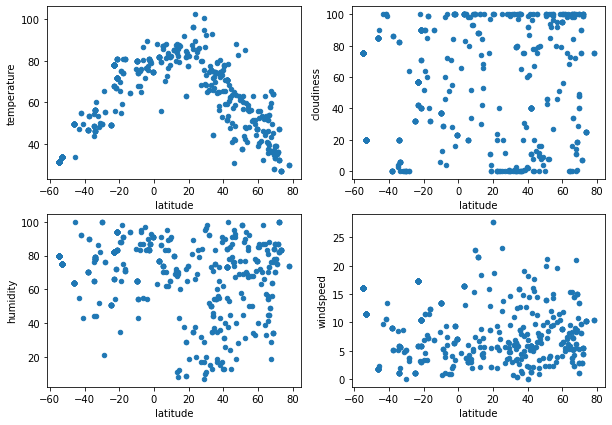

In [12]:
fig,ax=plt.subplots(2,2, figsize=(10,7))
citi_data.plot.scatter(x='latitude',y='temperature', ax = ax[0,0])
citi_data.plot.scatter(x='latitude',y='cloudiness', ax = ax[0,1])
citi_data.plot.scatter(x='latitude',y='humidity', ax = ax[1,0])
citi_data.plot.scatter(x='latitude',y='windspeed', ax = ax[1,1])
ax

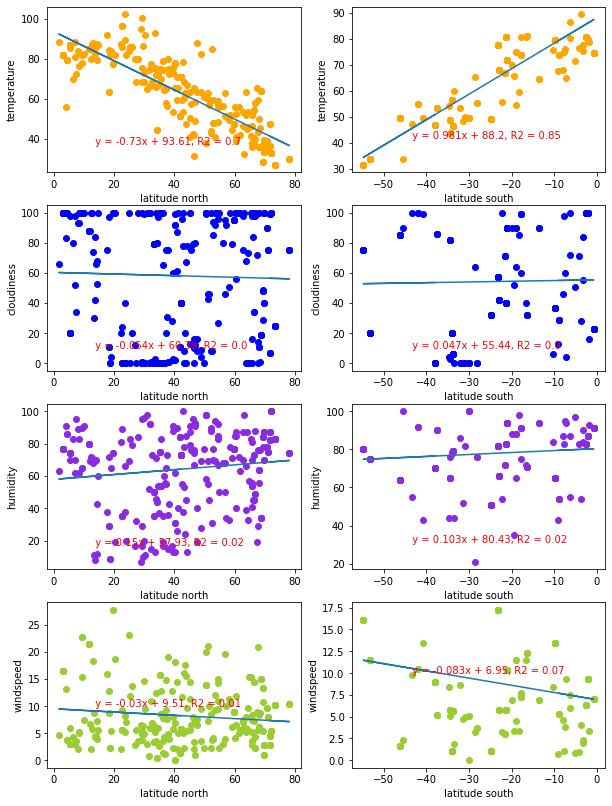

In [13]:
var_list =['temperature','cloudiness','humidity','windspeed']
color_list =['orange','blue','blueviolet','yellowgreen']
north = citi_data['latitude']>0
south = citi_data['latitude']<0
fig,ax1 = plt.subplots(4,2,figsize=(10,14))


for index,variable in enumerate(var_list):
    x_north = citi_data.loc[north,'latitude']
    x_south = citi_data.loc[south,'latitude']
    y_north = citi_data.loc[north,variable]
    y_south = citi_data.loc[south,variable]  

    ax1[index,0].scatter(x=x_north,y=y_north,color=color_list[index])
    ax1[index,0].set(ylabel = variable, xlabel='latitude north' )
    ax1[index,1].scatter(x=x_south,y=y_south,color=color_list[index])
    ax1[index,1].set(ylabel = variable, xlabel='latitude south')
    
    (slope_n, intercept_n, rval_n, pval, stderr) = linregress(x_north,y_north)
    (slope_s, intercept_s, rval_s, pval, stderr) = linregress(x_south,y_south)
    
    yval_north = slope_n*x_north + intercept_n
    yval_south = slope_s*x_south + intercept_s
    ax1[index,0].plot(x_north,yval_north)
    ax1[index,1].plot(x_south,yval_south)
    eqn_north = f'  y = {round(slope_n,3)}x + {round(intercept_n,2)}, R2 = {round(rval_n*rval_n,2)}'
    eqn_south = f'  y = {round(slope_s,3)}x + {round(intercept_s,2)}, R2 = {round(rval_s*rval_s,2)}'
    ymin = y_north.min()
    xmin = x_north.min()
    ax1[index,0].annotate(eqn_north,(xmin+10,ymin+10),fontsize=10,color="red")
    ymin = y_south.min()  
    xmin = x_south.min()
    ax1[index,1].annotate(eqn_south,(xmin+10,ymin+10),fontsize=10,color="red")
    
    